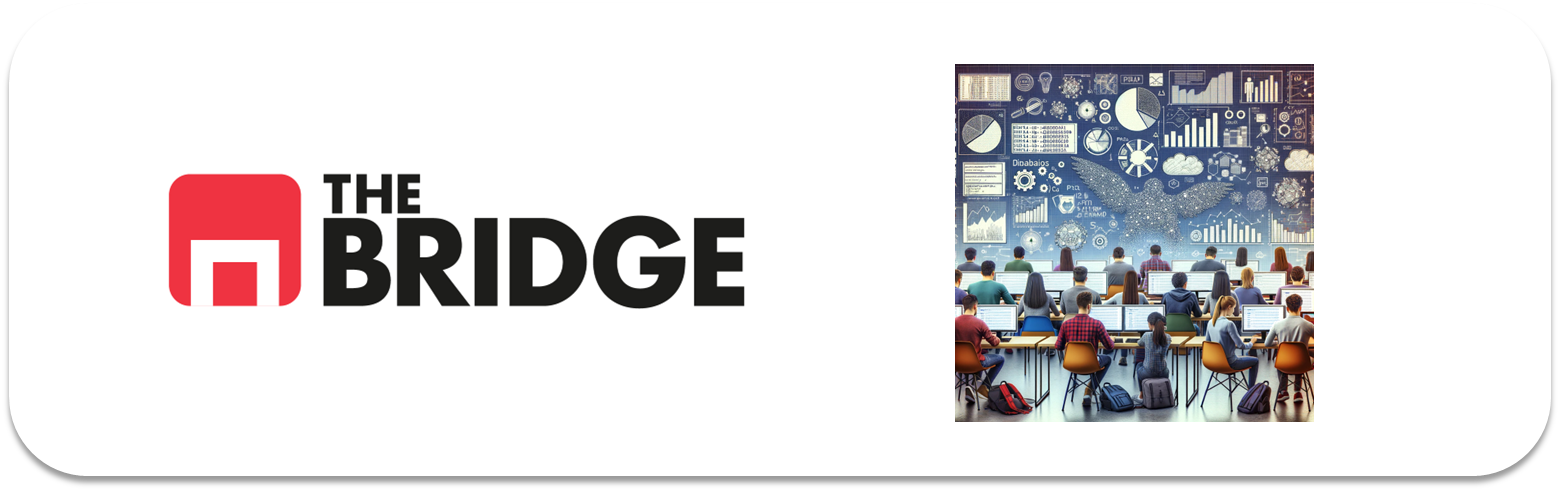

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [463]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics

In [464]:
# Importar datos
datos = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep='|')    

datos.sample(5)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


<Axes: xlabel='MEDV', ylabel='Count'>

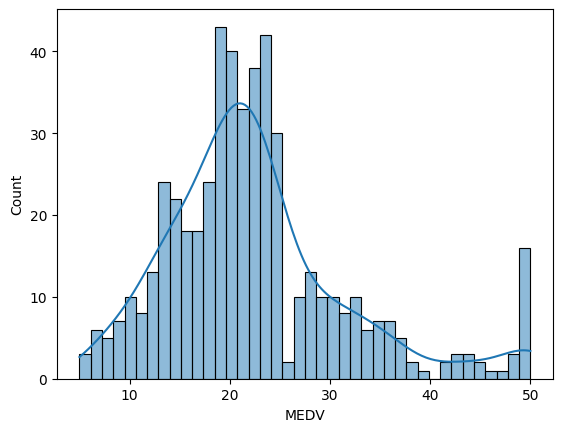

In [465]:
# Variable target
target = datos['MEDV']

# features
f_num = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']

# Distribucion variable target
sns.histplot(target, bins=40, kde=True)

In [466]:
# Split de datos
X = datos.drop('MEDV', axis=1)
y = datos['MEDV'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [467]:
# Mini EDA sobre las variables en X_train
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


In [468]:
X_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.630947,10.549020,11.737745,0.058824,0.547609,6.160833,68.648039,3.742949,10.313725,424.892157,18.999020,13.428235
std,7.459607,24.083242,6.722576,0.236456,0.108602,0.663825,28.890866,2.010749,9.161889,177.462472,1.800577,7.244601
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.561000,6.200000,1.169100,1.000000,188.000000,13.000000,2.880000
25%,0.087368,0.000000,6.102500,0.000000,0.448250,5.870250,43.800000,2.263950,4.000000,281.750000,18.400000,7.687500
50%,0.209885,0.000000,10.590000,0.000000,0.532000,6.170500,74.700000,3.353400,5.000000,345.000000,19.200000,12.335000
75%,4.522472,0.000000,18.100000,0.000000,0.621500,6.479250,95.225000,4.764825,24.000000,666.000000,20.200000,18.017500
max,45.746100,95.000000,27.740000,1.000000,0.871000,8.034000,100.000000,10.710300,24.000000,711.000000,22.000000,36.980000


In [469]:
# crear un df para el DEA
df_dea = pd.concat([X_train, y_train], axis=1)

features_num =  ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','LSTAT','MEDV']
features_cat = ['CHAS','RAD']


##### Análisis features numericas

In [470]:
corr_matrix = df_dea[features_num].corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
AGE       -0.340216
CRIM      -0.380091
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [471]:
## Tan importante es la correlación como la anticorrelación (valores cercanos a 1 y a -1), así que mejor convertir a valores absolutos
corr_matrix["MEDV"].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
TAX        0.459795
NOX        0.415768
CRIM       0.380091
AGE        0.340216
ZN         0.309504
DIS        0.235114
Name: MEDV, dtype: float64

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

<Axes: >

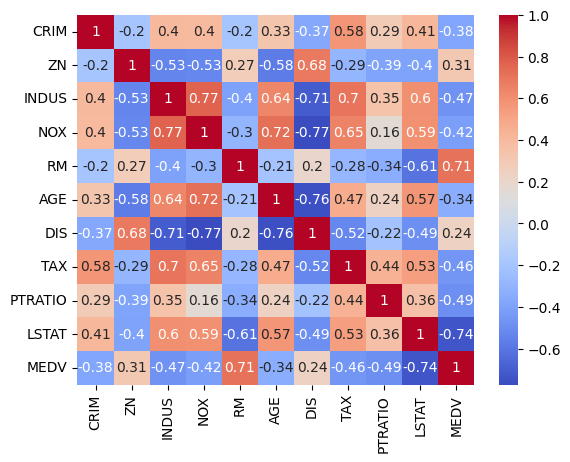

In [472]:
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

In [473]:
criterio = 0.31  # Fijamos un criterio para seleccionar nuestras features numéricas

# Seleccionamos la columna 'MEDV', tomamos el valor absoluto y filtramos por criterio
vars = corr_matrix['MEDV'][corr_matrix['MEDV'].abs() > criterio].index.to_list()

# Quitamos el target
vars.remove('MEDV')

# Identificar variables descartadas
discarded_vars = corr_matrix['MEDV'][corr_matrix['MEDV'].abs() <= criterio].index.to_list()

print("Variables seleccionadas:", vars)
print("Variables descartadas por baja correlación con MEDV:", discarded_vars)



Variables seleccionadas: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
Variables descartadas por baja correlación con MEDV: ['ZN', 'DIS']


In [474]:
# Eliminar variables con correlación entre ellas con más de 0.7
final_vars = []
for var in vars:
    # Eliminar variables con correlación entre ellas superior a 0.7
    if all(abs(corr_matrix.loc[var, final_var]) < 0.7 for final_var in final_vars):
        final_vars.append(var)

# Variables no seleccionadas
not_selected_vars = [var for var in vars if var not in final_vars]

# Mostrar los resultados
print("\nVariables seleccionadas:", final_vars)
print("\nVariables no seleccionadas:", not_selected_vars)


Variables seleccionadas: ['CRIM', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']

Variables no seleccionadas: ['NOX', 'TAX']


In [475]:
X_train.drop(['ZN','DIS','NOX','TAX'],axis=1, inplace=True)
X_test.drop(['ZN','DIS','NOX','TAX'],axis=1, inplace=True)

X_train

,CRIM,INDUS,CHAS,RM,AGE,RAD,PTRATIO,LSTAT
477,15.02340,18.10,0.0,5.304,97.3,24.0,20.2,24.91
15,0.62739,8.14,0.0,5.834,56.5,4.0,21.0,8.47
332,0.03466,6.06,0.0,6.031,23.3,1.0,16.9,7.83
423,7.05042,18.10,0.0,6.103,85.1,24.0,20.2,23.29
19,0.72580,8.14,0.0,5.727,69.5,4.0,21.0,11.28
...,...,...,...,...,...,...,...,...
106,0.17120,8.56,0.0,5.836,91.9,5.0,20.9,18.66
270,0.29916,6.96,0.0,5.856,42.1,3.0,18.6,13.00
348,0.01501,2.01,0.0,6.635,29.7,4.0,17.0,5.99
435,11.16040,18.10,0.0,6.629,94.6,24.0,20.2,23.27


##### Transformaciones variables numéricas

In [476]:
features_num = ['CRIM', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']

X_train[features_num].describe()

,CRIM,INDUS,RM,AGE,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,10.985050,6.315891,68.556436,18.318317,12.457351
std,8.875058,6.894618,0.709452,27.994922,2.228701,7.110381
min,0.009060,0.740000,3.863000,2.900000,12.600000,1.730000
25%,0.081437,5.130000,5.890500,45.550000,16.800000,6.772500
50%,0.261390,8.560000,6.210000,77.700000,18.700000,10.925000
75%,3.202962,18.100000,6.636750,93.650000,20.200000,16.372500
max,88.976200,27.740000,8.780000,100.000000,22.000000,37.970000


In [477]:
# Análsis de dispersión de variables numéricas
df_var = X_train[features_num].describe().loc[["std","mean"]].T 
df_var["CV"] = df_var["std"] / df_var["mean"]*100
df_var

,std,mean,CV
CRIM,8.875058,3.609125,245.906117
INDUS,6.894618,10.985050,62.763646
RM,0.709452,6.315891,11.232805
AGE,27.994922,68.556436,40.834857
PTRATIO,2.228701,18.318317,12.166516
LSTAT,7.110381,12.457351,57.077791


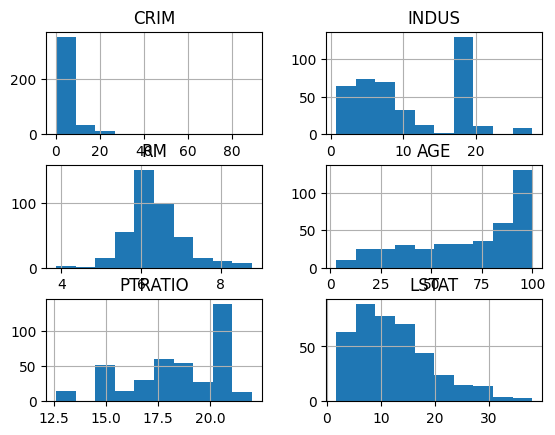

In [478]:
X_train[features_num].hist();

In [479]:
X_train[features_num].apply(lambda x: np.log(x+1)).describe()

,CRIM,INDUS,RM,AGE,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.808846,2.284991,1.985419,4.112460,2.953927,2.459962
std,1.016988,0.668017,0.096270,0.589305,0.121763,0.539900
min,0.009019,0.553885,1.581656,1.360977,2.610070,1.004302
25%,0.078291,1.813195,1.930144,3.840525,2.879198,2.050590
50%,0.232213,2.257588,1.975469,4.365643,2.980619,2.478630
75%,1.435660,2.949688,2.032972,4.550185,3.054001,2.854886
max,4.499545,3.358290,2.280339,4.615121,3.135494,3.662792


In [480]:
df_var = X_train[features_num].apply(lambda x: np.log(x + 1)).describe().loc[["std","mean"]].T 
df_var["CV"] = df_var["std"] / df_var["mean"]*100
df_var

,std,mean,CV
CRIM,1.016988,0.808846,125.733217
INDUS,0.668017,2.284991,29.234998
RM,0.096270,1.985419,4.848834
AGE,0.589305,4.112460,14.329736
PTRATIO,0.121763,2.953927,4.122064
LSTAT,0.539900,2.459962,21.947478


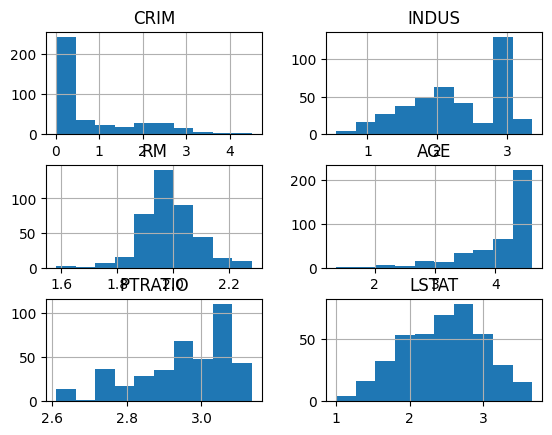

In [481]:
X_train[features_num].apply(lambda x: np.log(x + 1)).hist();

In [482]:
features_num

['CRIM', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']

In [483]:
features_log = ["LSTAT","PTRATIO","CRIM","AGE"] # Aplico transformación logarítmica a estas variables

# Transformación de variables
for feature in features_log:
    X_train[feature] = X_train[feature].apply(np.log)

for feature in features_log:
    X_test[feature] = X_test[feature].apply(np.log)

In [484]:
# Escalado de variables
scaler = StandardScaler()
scaler.fit(X_train[features_num]) # seleccionamos el standar scaler por los valores extremos en las variables ZN, entreno solo con datos de train


StandardScaler()

In [485]:
scaler.scale_

array([2.14475377, 6.88607935, 0.70857318, 0.60964974, 0.12874714,
       0.60168758])

In [486]:
# Aplico escalado a ambos sets, train y test
X_train[features_num] = scaler.transform(X_train[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])

##### Análisis de variables categóricas

In [487]:
features_cat = ["CHAS","RAD"]
df_dea[features_cat]

,CHAS,RAD
477,0.0,24.0
15,0.0,4.0
332,0.0,1.0
423,0.0,24.0
19,0.0,4.0
...,...,...
106,0.0,5.0
270,0.0,3.0
348,0.0,4.0
435,0.0,24.0


<Axes: xlabel='MEDV', ylabel='Count'>

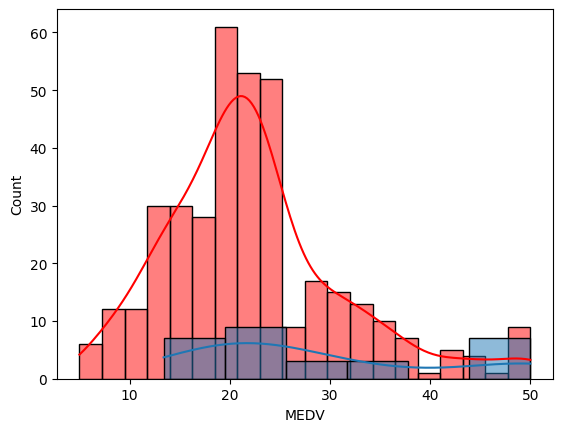

In [488]:
# Análisis variables categóricas
sns.histplot(x= 'MEDV', data = df_dea[df_dea.CHAS == 0], kde = True, color = "red")
sns.histplot(x= 'MEDV', data = df_dea[df_dea.CHAS == 1], kde = True)

<Axes: xlabel='MEDV', ylabel='Count'>

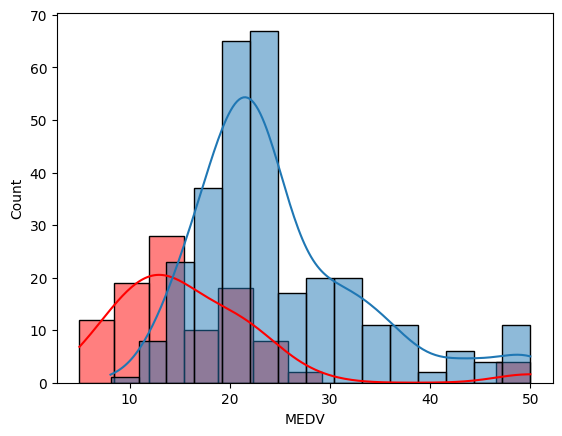

In [489]:
sns.histplot(x= 'MEDV', data = df_dea[df_dea.RAD == 24], kde = True, color = "red") # Comprobamos CHAS igual a 24 y CHAS distinto a 24
sns.histplot(x= 'MEDV', data = df_dea[df_dea.RAD != 24], kde = True)

In [490]:
X_train.describe()

,CRIM,INDUS,CHAS,RM,AGE,RAD,PTRATIO,LSTAT
count,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02
mean,-3.297692e-18,-4.177077e-17,0.071782,-2.616169e-16,1.334466e-15,9.356436,-1.875288e-15,1.648846e-18
std,1.001240e+00,1.001240e+00,0.258447,1.001240e+00,1.001240e+00,8.589721,1.001240e+00,1.001240e+00
min,-1.831385e+00,-1.487791e+00,0.000000,-3.461733e+00,-4.964232e+00,1.000000,-2.844640e+00,-3.000707e+00
25%,-8.075264e-01,-8.502733e-01,0.000000,-6.003488e-01,-4.467229e-01,4.000000,-6.101665e-01,-7.325080e-01
50%,-2.637886e-01,-3.521669e-01,0.000000,-1.494427e-01,4.292661e-01,5.000000,2.220434e-01,6.221804e-02
75%,9.044722e-01,1.033237e+00,0.000000,4.528240e-01,7.355219e-01,12.000000,8.213505e-01,7.345853e-01
max,2.454541e+00,2.433163e+00,1.000000,3.477564e+00,8.431348e-01,24.000000,1.484354e+00,2.132647e+00


In [491]:
X_test.describe()

,CRIM,INDUS,CHAS,RM,AGE,RAD,PTRATIO,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-0.010222,0.109307,0.058824,-0.218831,-0.002851,10.313725,0.307385,0.143094
std,1.039657,0.976256,0.236456,0.936848,1.008910,9.161889,0.789641,0.985020
min,-1.999306,-1.528453,0.000000,-3.887942,-3.717879,1.000000,-2.601896,-2.153641
25%,-0.774743,-0.709046,0.000000,-0.628927,-0.511184,4.000000,0.096426,-0.521901
50%,-0.367207,-0.057369,0.000000,-0.205189,0.364674,5.000000,0.426994,0.263976
75%,1.065387,1.033237,0.000000,0.230546,0.762878,24.000000,0.821351,0.893702
max,2.144360,2.433163,1.000000,2.424744,0.843135,24.000000,1.484354,2.088738


In [492]:
# construcción de modelos
# Modelo de regresión lineal
lr = LinearRegression() # Crear modelo
lr.fit(X_train[final_vars], y_train) # Entrenar modelo con datos de entrenamiento


LinearRegression()

In [493]:
# pesos de las features
coef_df = pd.DataFrame(lr.coef_, X_train[final_vars].columns, 
                      columns=['Coefficient'])

coef_df.sort_values(by='Coefficient', ascending=False)


,Coefficient
RM,2.216454
AGE,1.101298
INDUS,0.045758
CRIM,-0.045800
PTRATIO,-1.676677
LSTAT,-6.038741


In [494]:
# EVALUACIÓN DEL MODELO
# Predicciones
y_train_pred = lr.predict(X_train[final_vars])
y_test_pred = lr.predict(X_test[final_vars])

# Evaluación del modelo
print("Métricas de entrenamiento:")
print("MAE:", metrics.mean_absolute_error(y_train, y_train_pred))
print("MSE:", metrics.mean_squared_error(y_train, y_train_pred))   
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("R2:", metrics.r2_score(y_train, y_train_pred))

print("\nMétricas de test:")
print("MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R2:", metrics.r2_score(y_test, y_test_pred))

Métricas de entrenamiento:
MAE: 3.4553926543280644
MSE: 21.883089889905797
RMSE: 4.677936499131406
R2: 0.7481036896863951

Métricas de test:
MAE: 2.909232195797857
MSE: 20.595597238004945
RMSE: 4.5382372390615435
R2: 0.7191526694732403


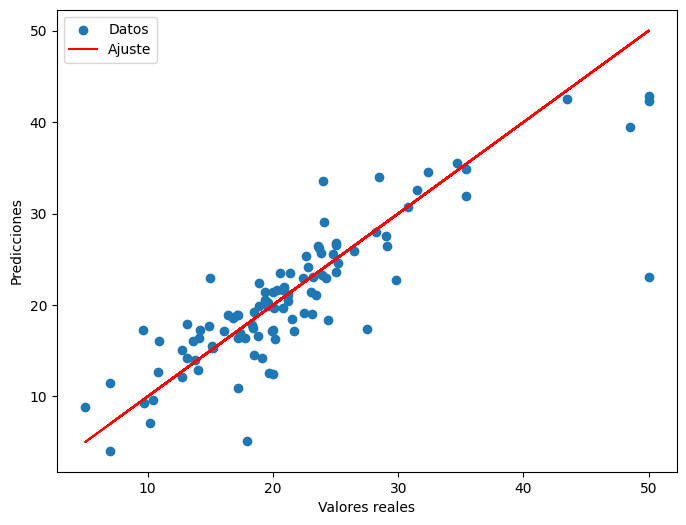

In [495]:
# Representación de las predicciones de test contra valores reales de test, y el ajuste perfecto
plt.figure(figsize=(8, 6))  # Asegurar un tamaño adecuado de la figura

# Generar el gráfico de dispersión
plt.scatter(y_test, y_test_pred, label="Datos")
plt.plot(y_test, y_test, label="Ajuste", color="red")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()


In [504]:
X_train.describe()

,CRIM,INDUS,CHAS,RM,AGE,RAD,PTRATIO,LSTAT
count,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02
mean,-3.297692e-18,-4.177077e-17,0.071782,-2.616169e-16,1.334466e-15,9.356436,-1.875288e-15,1.648846e-18
std,1.001240e+00,1.001240e+00,0.258447,1.001240e+00,1.001240e+00,8.589721,1.001240e+00,1.001240e+00
min,-1.831385e+00,-1.487791e+00,0.000000,-3.461733e+00,-4.964232e+00,1.000000,-2.844640e+00,-3.000707e+00
25%,-8.075264e-01,-8.502733e-01,0.000000,-6.003488e-01,-4.467229e-01,4.000000,-6.101665e-01,-7.325080e-01
50%,-2.637886e-01,-3.521669e-01,0.000000,-1.494427e-01,4.292661e-01,5.000000,2.220434e-01,6.221804e-02
75%,9.044722e-01,1.033237e+00,0.000000,4.528240e-01,7.355219e-01,12.000000,8.213505e-01,7.345853e-01
max,2.454541e+00,2.433163e+00,1.000000,3.477564e+00,8.431348e-01,24.000000,1.484354e+00,2.132647e+00


In [512]:
### Regularizacion # Los hiperparámetros no están optimizados, haced vuestras propias pruebas

from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_reg = Ridge(alpha = 10) # L2
lasso_reg = Lasso(alpha = 10) # L1
elastic_reg = ElasticNet(alpha = 10, l1_ratio = 0.5) # l1_ratio*L1 + (1-l1_ratio)*L2

for nombre, model in zip(["Ridge","Lasso","ElasticNet"],[ridge_reg, lasso_reg, elastic_reg]):
    model.fit(X_train,y_train)
    print("Modelo:", nombre)
    print("TRAIN:")
    pred_train  = model.predict(X_train)
    print("\tMAE:", metrics.mean_absolute_error(y_train, pred_train))
    print("\tRMSE:", metrics.root_mean_squared_error(y_train, pred_train))
    print("\tR^2:", metrics.r2_score(y_train, pred_train))
    print("TEST:")
    pred_test = model.predict(X_test)
    print("\tMAE:", metrics.mean_absolute_error(y_test, pred_test))
    print("\tRMSE:", metrics.root_mean_squared_error(y_test, pred_test))
    print("\tR^2:", metrics.r2_score(y_test, pred_test))
    print("")

Modelo: Ridge
TRAIN:
	MAE: 3.392131932972103
	RMSE: 4.63225792911144
	R^2: 0.7529990471758715
TEST:
	MAE: 2.811777619323523
	RMSE: 4.528158030296007
	R^2: 0.7203987812478225

Modelo: Lasso
TRAIN:
	MAE: 6.375536385089074
	RMSE: 8.671201265712813
	R^2: 0.13449078690324734
TEST:
	MAE: 5.754398129912347
	RMSE: 8.088798548059035
	R^2: 0.1077964461748655

Modelo: ElasticNet
TRAIN:
	MAE: 6.163282745473473
	RMSE: 8.377620562480486
	R^2: 0.19210571714389713
TEST:
	MAE: 5.569546164771859
	RMSE: 7.844378314061917
	R^2: 0.16090144975068155



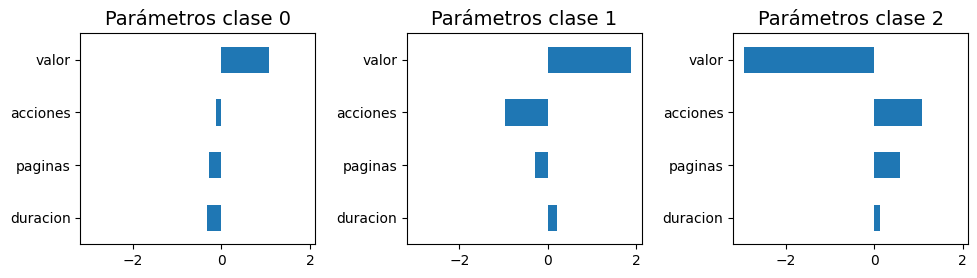

In [ ]:
df_coefs = pd.DataFrame(clf.coef_, columns=X_train.columns)

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=True)
for i, subdf in df_coefs.iterrows():
    subdf.plot(kind="barh", ax=ax[i])
    ax[i].set_title(f"Parámetros clase {i}")

fig.tight_layout()

In [509]:
# Regularización Ridge

lr_Ridge = Ridge(alpha=10) # definimos el modelo Ridge con un alpha=10

lr_Ridge.fit(X_train, y_train) # entrenamos el modelo Ridge

# Error de entrenamiento en el conjunto train
y_pred_train = lr_Ridge.predict(X_train) # predicciones sobre el conjunto de entrenamiento
print("MAE entrenamiento: ", metrics.mean_absolute_error(y_train, y_pred_train))
print("RMSE entrenamiento: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2 entrenamiento: ", metrics.r2_score(y_train, y_pred_train))

# Error de test sobre el conjunto test
y_pred_test = lr_Ridge.predict(X_test) # predicciones sobre el conjunto de test
print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred_test))
print("RMSE test: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R2 test: ", metrics.r2_score(y_test, y_pred_test))

MAE entrenamiento:  3.392131932972103
RMSE entrenamiento:  4.63225792911144
R2 entrenamiento:  0.7529990471758715
MAE test:  2.811777619323523
RMSE test:  4.528158030296007
R2 test:  0.7203987812478225


In [499]:
# Regularización Ridge, buscando el mejor alpha

# Inicialización de variables para almacenar el mejor resultado
best_alpha = None
best_r2_test = -np.inf  # Inicialmente el peor R2 posible
best_metrics = {}

# Bucle para probar valores de alpha de 0 a 100 en pasos de 5
for alpha in range(0, 1500, 5):  # 105 porque el rango es exclusivo en el límite superior
    if alpha == 0:
        alpha = 0.0001  # Evitar alpha=0, que puede no ser válido para Ridge
    
    # Definir y entrenar el modelo Ridge
    lr_Ridge = Ridge(alpha=alpha)
    lr_Ridge.fit(X_train[final_vars], y_train)
    
    # Predicciones sobre el conjunto de entrenamiento
    y_pred_train = lr_Ridge.predict(X_train[final_vars])
    r2_train = metrics.r2_score(y_train, y_pred_train)
    
    # Predicciones sobre el conjunto de prueba
    y_pred_test = lr_Ridge.predict(X_test[final_vars])
    r2_test = metrics.r2_score(y_test, y_pred_test)
    
    # Actualizar si el modelo actual es mejor
    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_alpha = alpha
        best_metrics = {
            "MAE_train": metrics.mean_absolute_error(y_train, y_pred_train),
            "RMSE_train": np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
            "R2_train": r2_train,
            "MAE_test": metrics.mean_absolute_error(y_test, y_pred_test),
            "RMSE_test": np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
            "R2_test": r2_test
        }

# Imprimir las métricas del mejor modelo
print(f"Mejor alpha seleccionado: {best_alpha}")
print("Métricas para el mejor modelo:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value}")

Mejor alpha seleccionado: 0.0001
Métricas para el mejor modelo:
MAE_train: 3.455392498071603
RMSE_train: 4.677936499131969
R2_train: 0.7481036896863343
MAE_test: 2.9092319686537738
RMSE_test: 4.538237372169983
R2_test: 0.7191526529984954


In [498]:
# Regularización Lasso buscando el mejor alpha

# Inicialización de variables para almacenar el mejor resultado
best_alpha = None
best_r2_test = -np.inf  # Inicialmente el peor R² posible
best_metrics = {}

# Bucle para probar valores de alpha de 0 a 100 en pasos de 5
for alpha in range(0, 105, 5):  # 105 porque el rango es exclusivo en el límite superior
    if alpha == 0:
        alpha = 0.0001  # Evitar alpha=0, que no es válido para Lasso
    
    # Definir y entrenar el modelo Lasso
    lr_Lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter aumentado para asegurar convergencia
    lr_Lasso.fit(X_train[final_vars], y_train)
    
    # Predicciones sobre el conjunto de entrenamiento
    y_pred_train = lr_Lasso.predict(X_train[final_vars])
    r2_train = metrics.r2_score(y_train, y_pred_train)
    
    # Predicciones sobre el conjunto de prueba
    y_pred_test = lr_Lasso.predict(X_test[final_vars])
    r2_test = metrics.r2_score(y_test, y_pred_test)
    
    # Actualizar si el modelo actual es mejor
    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_alpha = alpha
        best_metrics = {
            "MAE_train": metrics.mean_absolute_error(y_train, y_pred_train),
            "RMSE_train": np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
            "R2_train": r2_train,
            "MAE_test": metrics.mean_absolute_error(y_test, y_pred_test),
            "RMSE_test": np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
            "R2_test": r2_test
        }

# Imprimir las métricas del mejor modelo
print(f"Mejor alpha seleccionado: {best_alpha}")
print("Métricas para el mejor modelo:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value}")

Mejor alpha seleccionado: 0.0001
Métricas para el mejor modelo:
MAE_train: 3.4554109562700783
RMSE_train: 4.677936511697059
R2_train: 0.7481036883331309
MAE_test: 2.9091795757183334
RMSE_test: 4.5382013487433435
R2_test: 0.719157111576934
